# La estructura de datos en serie

Una serie es un n-arreglo unidimensional con etiquetas.

Es un arreglo que te permite almacenar información de diferentes tipos sea por medio de cadenas de texto, flotantes o enteros, entre otros.

In [1]:
import pandas as pd
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

In [2]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [3]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [4]:
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [5]:
numbers = [1, -2, 3, -4, 5, -6, 7, -7, 7, -7, 8, -9, 10, -11, 12]
serie = pd.Series(numbers)
serie

0      1
1     -2
2      3
3     -4
4      5
5     -6
6      7
7     -7
8      7
9     -7
10     8
11    -9
12    10
13   -11
14    12
dtype: int64

In [6]:
serie.describe()

count    15.000000
mean      0.466667
std       7.529624
min     -11.000000
25%      -6.500000
50%       1.000000
75%       7.000000
max      12.000000
dtype: float64

In [7]:
serie.min()

-11

In [8]:
serie.max()

12

In [9]:
serie.abs()

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      7
8      7
9      7
10     8
11     9
12    10
13    11
14    12
dtype: int64

In [10]:
serie

0      1
1     -2
2      3
3     -4
4      5
5     -6
6      7
7     -7
8      7
9     -7
10     8
11    -9
12    10
13   -11
14    12
dtype: int64

In [11]:
serie.where(serie > 1)

0      NaN
1      NaN
2      3.0
3      NaN
4      5.0
5      NaN
6      7.0
7      NaN
8      7.0
9      NaN
10     8.0
11     NaN
12    10.0
13     NaN
14    12.0
dtype: float64

In [12]:
serie.where(serie > 1, 0)

0      0
1      0
2      3
3      0
4      5
5      0
6      7
7      0
8      7
9      0
10     8
11     0
12    10
13     0
14    12
dtype: int64

In [13]:
serie.where(serie > 1).dropna()

2      3.0
4      5.0
6      7.0
8      7.0
10     8.0
12    10.0
14    12.0
dtype: float64

In [14]:
serie1 = pd.Series([1, 2, 3, 5, 7])
serie2 = pd.Series([13, 17, 11, 5, 3])


In [15]:
serie1

0    1
1    2
2    3
3    5
4    7
dtype: int64

In [16]:
serie2

0    13
1    17
2    11
3     5
4     3
dtype: int64

In [17]:
serie1 < serie2

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [22]:
serie1 > serie2

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [23]:
serie1 == serie2

0    False
1    False
2    False
3     True
4    False
dtype: bool

Los diccionarios se pueden convertir en series

In [30]:
datos = {'a': 10, 'b': 20, 'c': 30, 'd': 40}

serie = pd.Series(datos)
serie

a    10
b    20
c    30
d    40
dtype: int64

In [31]:
serie['a']

np.int64(10)

In [32]:
import numpy as np
np.nan == None

False

In [35]:
type(None)
type(np.nan)

float

In [36]:
np.nan == np.nan

False

In [38]:
np.isnan(np.nan)

np.True_

In [39]:
np.isnan(1)

np.False_

In [45]:
datos = ['2.3', 'Python', '90', '100', np.nan, '0.5', '.9']

serie = pd.Series(datos)

serie

0       2.3
1    Python
2        90
3       100
4       NaN
5       0.5
6        .9
dtype: object

In [48]:
serie = serie.dropna()
print(serie)

0       2.3
1    Python
2        90
3       100
5       0.5
6        .9
dtype: object


In [50]:
datos = [1, 3, 7, 11, 'Python', '-0.5', np.nan]

serie = pd.Series(datos)

serie

0         1
1         3
2         7
3        11
4    Python
5      -0.5
6       NaN
dtype: object

In [53]:
serie2 = serie.fillna(10, inplace=False)

print(serie)
print(serie2)

0         1
1         3
2         7
3        11
4    Python
5      -0.5
6       NaN
dtype: object
0         1
1         3
2         7
3        11
4    Python
5      -0.5
6        10
dtype: object


# La estructura de datos Data Frame con [pandas][]

Pandas DataFrame es una estructura de datos como cualquier tabla con filas y columnas. Los valores de la dataframe pueden ser modficados. Por ello es el objeto de pandas mas comunmente usado. Existen distintas maneras de crear Data Frames. Entre ellas esta la funcion DataFrame().



```
import pandas as pd
pd.DataFrame(data, index, columns)
```

[pandas]:https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide


Para crear un data frame se usa la siguiente sintaxis
data: Es el conjunto de datos con el que se crea el Data Frame. Pueden ser una lista, un diccionario, un valor escalar, una serie, un arreglo ndarray, etc.

index: Es opcional, por defecto, el indice empieza en 0 y termina en n-1 para una lista de n valores. Define de manera explicita la etiqueta de las filas.

columns: Se usa para crear los nombres de las columnas. Si no se define el nombre de las columnas, de manera similar toma valores de 0 a n-1

In [62]:
# Importing Pandas to create DataFrame
import pandas as pd
  
# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame(index=["a","B"],columns=["Uno","dos"])
  
# Printing Empty DataFrame
print(df)

   Uno  dos
a  NaN  NaN
B  NaN  NaN


In [63]:
df

,Uno,dos
a,NaN,NaN
B,NaN,NaN


# Formas de crear data Frames


## A partir de listas

In [67]:
# Primero se crea la lista de datos a usar.
data = [10,20,30,40,50,60]
  
# Se crea la base de datos usando el nombre Numeros para la columna.
df = pd.DataFrame(data, columns=['Numeros'])
  
# Se imprime 
df

,Numeros
0,10
1,20
2,30
3,40
4,50
5,60


In [68]:
type(df)

pandas.core.frame.DataFrame

## A partir de listas de listas


In [70]:
# Primero se crea la lista de listas, cada elemento corresponde al par del nombre y edad de una persona.
data = [['juan', 10], ['pepe', 15], ['julia', 14]]
  
# Luego creamos la base de datos 
df = pd.DataFrame(data,columns=["Nombre","Edad"],index=["Estudiante1","Estudiante2","Estudiante3"])

# Se imprime
df

,Nombre,Edad
Estudiante1,juan,10
Estudiante2,pepe,15
Estudiante3,julia,14


# A partir de diccionarios 
Se puede crear una Data Frame a partir de uno o varios diccionarios. Para hacerlo a partir de uno simplemente lo convertimos a lista y posteriormente a dataframe, para construirlo a partir de varios unimos los diccionarios en una lista

In [73]:
# Creamos el diccionario
data_1 = {'Nombre': 'juan','Edad':20}
lista = []
lista.append(data_1)
# Hacemos la base de datos a partir de un diccionario 
df = pd.DataFrame(lista)
  
# Imprimimos
df

,Nombre,Edad
0,juan,20


In [76]:
# Creamos el segundo diccionario
data_2 = {'Nombre': 'pepe','Edad': 25}

# Agregamos el nuevo diccionario a lista creada anteriormente
lista.append(data_2)

df = pd.DataFrame(lista)
df

,Nombre,Edad
0,juan,20
1,pepe,25
2,pepe,25


In [78]:
# Se crea la lista con diccionarios
data = [{'a': 1, 'b': 2, 'c': 3},
        {'a': 10, 'b': 20, 'c': 30}]
  
# Se convierte en data frame
df = pd.DataFrame(data)

# Se imprime
df

,a,b,c
0,1,2,3
1,10,20,30


In [80]:
# Se crea la lista con diccionarios
data = [{'a': 1, 'b': 2, 'c': 3}]
  
# Se convierte en data frame
df = pd.DataFrame(data)

# Se imprime
df

,a,b,c
0,1,2,3


# A partir de diccionarios con listas
Para crear una Data Frame de un diccionario de arreglos o listas, todos los arreglos deben ser del mismo tamaño. El indice debe ser del mismo tamaño que los arreglos, si no se declara el indice, se toma el tamaño del areglo, n, y el indice es range(n).

In [81]:
# Creamos el diccionario
data = {'Nombre': ['juan', 'pepe', 'julia', 'ana'],
        'Edad': [20, 21, 19, 18]}

# Hacemos la base de datos a partir del diccionario 
df = pd.DataFrame(data)
  
# Imprimimos
df

,Nombre,Edad
0,juan,20
1,pepe,21
2,julia,19
3,ana,18


Adicionalmente se pueden dar las etiquetas o índices explícitamente

In [82]:
# Se crea el diccionario
data = {'Nombre': ['juan', 'pepe', 'julia', 'ana'],
        'Calificacion': [99, 98, 95, 90]}

# Se convierte en dataframe y se específica el índice
df = pd.DataFrame(data, index=['Estudiante  1','Estudiante  2','Estudiante  3','Estudiante  4'])
  
# Se imprime    
df

,Nombre,Calificacion
Estudiante 1,juan,99
Estudiante 2,pepe,98
Estudiante 3,julia,95
Estudiante 4,ana,90


También se puede agregar el nombre de las columnas

In [91]:
# Primero se crea la lista de listas, cada elemento corresponde al par del nombre y edad de una persona.
data = [['juan', 10], ['pepe', 15], ['julia', 14]]
  
# Luego creamos la base de datos y nombramos las columnas como Nombre y Edad
df = pd.DataFrame(data, columns=['Nombre', 'Edad'], index=['Estudiante 1','Estudiante 2','Estudiante 3'])

# Se imprime
df

,Nombre,Edad
Estudiante 1,juan,10
Estudiante 2,pepe,15
Estudiante 3,julia,14


In [95]:
df.iloc[0]

Nombre    juan
Edad        10
Name: Estudiante 1, dtype: object

In [97]:
df.Nombre.iloc[1]

'pepe'

**Ejercicio** Una universidad desea organizar la información de sus estudiantes de nuevo ingreso en un DataFrame para facilitar su análisis. Se tiene la siguiente información de 4 estudiantes:

| Nombre  | Edad | Carrera      | Promedio |
|---------|------|--------------|----------|
| Ana     | 23   | Física       | 8.9      |
| Luis    | 21   | Matemáticas  | 9.1      |
| Marta   | 22   | Biología     | 8.4      |
| Carlos  | 24   | Química      | 8.7

1. **Crea un DataFrame** utilizando `pandas` que contenga la información de los estudiantes mostrada en la tabla.
2. **Define una clase** llamada `Estudiante` que contenga como atributos:
   - `nombre`
   - `edad`
   - `carrera`
   - `promedio`      |

In [101]:
#%%  Crear el DataFrame con pandas
import pandas as pd

# Datos de los estudiantes
data = {
    "Nombre": ["Ana", "Luis", "Marta", "Carlos"],
    "Edad": [23, 21, 22, 24],
    "Carrera": ["Física", "Matemáticas", "Biología", "Química"],
    "Promedio": [8.9, 9.1, 8.4, 8.7]
}

# Crear DataFrame
df_estudiantes = pd.DataFrame(data)
df_estudiantes


,Nombre,Edad,Carrera,Promedio
0,Ana,23,Física,8.9
1,Luis,21,Matemáticas,9.1
2,Marta,22,Biología,8.4
3,Carlos,24,Química,8.7


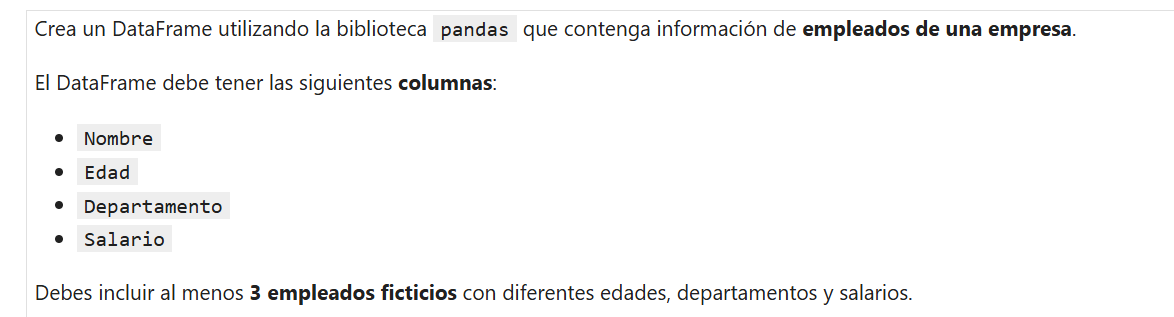

In [103]:
df = {
    'nombre': ['Luis', 'Roberto', 'Hugo'],
    'edad': [33, 73,25],
    'Depto': ['amueblado', 'indigente', np.nan],
    'Salario' : [30000, 0, np.nan]
}
df_empleado = pd.DataFrame(df)
print(df_empleado)

    nombre  edad      Depto  Salario
0     Luis    33  amueblado  30000.0
1  Roberto    73  indigente      0.0
2     Hugo    25        NaN      NaN


## Guardar DataFrames

Para guardar los dataframes se puede usar las siguientes instrucciones:

```
df.to_csv('df.csv')
df.to_excel("df.xlsx")
df.to_csv(r'Datos.txt', header=None, index=None, sep='\t', mode='a')
```


In [116]:
df


{'nombre': ['Luis', 'Roberto', 'Hugo'],
 'edad': [33, 73, 25],
 'Depto': ['amueblado', 'indigente', nan],
 'Salario': [30000, 0, nan]}

In [117]:
import pandas as pd
df_empleado.to_csv('/home/fcisnerosr/github/python_curso_IMP/df_prueba1.csv', index = False)

In [118]:
df_empleado.to_csv('/home/fcisnerosr/github/python_curso_IMP/df_prueba2.csv',header=None)

In [119]:
df_empleado.to_excel('/home/fcisnerosr/github/python_curso_IMP/df_prueba_xls.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
df_empleado.to_excel('df_prueba_xls.xlsx',sheet_name='Datos')

In [ ]:
df_empleado.to_csv(r'Datos_1.txt', sep=',', mode='w')

In [ ]:
df_empleado.to_csv(r'Datos.txt', header=None, index=None, sep='\t', mode='w')

## Leer DataFrames

Para leer los dataframes se puede usar la siguiente instrucción:

```
df = pd.read_csv('df.csv')
```

Un análisis de los tiempos de lectura se puede encontrar en esta [liga][]

[liga]:https://pythonspeed.com/articles/pandas-read-csv-fast/

In [ ]:
df_read = pd.read_csv('df_prueba1.csv')
df_read

In [ ]:
df_read = pd.read_csv('df_prueba1.csv')
df_read

In [ ]:
df_read = pd.read_csv('df_prueba1.csv', index_col=2)
df_read

In [ ]:
df_read = pd.read_excel('df_prueba_xls.xlsx', index_col=2)
df_read

In [ ]:
df_read = pd.read_csv('Datos_1.txt', sep=",",index_col=0)
df_read


In [ ]:
df_read = pd.read_csv('Datos.txt', sep="\t", header=None)
df_read


In [ ]:
df_read.iloc[0]

In [ ]:
df_read.iloc[0][0]

# Analisis de datos con pandas


In [19]:
#%%  Crear el DataFrame con pandas
import pandas as pd

# Datos de los estudiantes
data = {
    "Nombre": ["Ana", "Luis", "Marta", "Carlos"],
    "Edad": [23, 21, 22, 24],
    "Carrera": ["Física", "Matemáticas", "Biología", "Química"],
    "Promedio": [8.9, 9.1, 7.4, 8.7]
}

# Crear DataFrame
df_estudiantes = pd.DataFrame(data)
df_estudiantes

,Nombre,Edad,Carrera,Promedio
0,Ana,23,Física,8.9
1,Luis,21,Matemáticas,9.1
2,Marta,22,Biología,7.4
3,Carlos,24,Química,8.7


Como manipular el dateframe;

- **`df.columns`**: Muestra los nombres de las columnas, útil para conocer la estructura de los datos.

- **`df.head()`** y **`df.tail()`**: Muestran las primeras o últimas filas respectivamente, para tener un vistazo rápido del contenido.

- **`df.info()`**: Proporciona información general sobre el DataFrame, como tipos de datos y número de valores no nulos.

- **`df.describe()`**: Calcula estadísticas descriptivas (media, desviación estándar, min, max, percentiles) para columnas numéricas.

- **Acceder a una columna**: Usando `df["columna"]` se obtiene la serie correspondiente a esa columna.

- **Acceder a un elemento específico**: Con `df.loc[fila, columna]` o `df.iloc[fila_posición, columna_posición]` se accede a un dato puntual.

- **Filtrar filas por condición**: Se usa una expresión booleana dentro del DataFrame, por ejemplo `df[df["Promedio"] > 8.8]` devuelve filas que cumplen la condición.

- **Filtrar con varias condiciones**: Se combinan con operadores `&` (y) o `|` (o), usando paréntesis para agrupar, por ejemplo `df[(cond1) & (cond2)]`.

- **Ordenar datos**: Con `df.sort_values(by="columna", ascending=True/False)` se ordenan las filas según una columna.

- **Agregar una nueva columna**: Simplemente asignando, por ejemplo `df["NuevaColumna"] = [valores]`.

- **Modificar un valor**: Usando `df.loc[fila, columna] = nuevo_valor` se cambia un dato específico.


In [20]:

print("DataFrame completo:")
print(df_estudiantes)


DataFrame completo:
   Nombre  Edad      Carrera  Promedio
0     Ana    23       Física       8.9
1    Luis    21  Matemáticas       9.1
2   Marta    22     Biología       7.4
3  Carlos    24      Química       8.7


In [21]:
print("\nNombres de columnas:")
print(df_estudiantes.columns)


Nombres de columnas:
Index(['Nombre', 'Edad', 'Carrera', 'Promedio'], dtype='object')


In [22]:
print("\nPrimeras filas:")
print(df_estudiantes.head())


Primeras filas:
   Nombre  Edad      Carrera  Promedio
0     Ana    23       Física       8.9
1    Luis    21  Matemáticas       9.1
2   Marta    22     Biología       7.4
3  Carlos    24      Química       8.7


In [23]:
print("\nInformación general:")
print(df_estudiantes.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nombre    4 non-null      object 
 1   Edad      4 non-null      int64  
 2   Carrera   4 non-null      object 
 3   Promedio  4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes
None


In [24]:
print("\nEstadísticas descriptivas:")
print(df_estudiantes.describe())



Estadísticas descriptivas:
            Edad  Promedio
count   4.000000  4.000000
mean   22.500000  8.525000
std     1.290994  0.767572
min    21.000000  7.400000
25%    21.750000  8.375000
50%    22.500000  8.800000
75%    23.250000  8.950000
max    24.000000  9.100000


In [25]:
print("\nAcceder a la columna 'Nombre':")
print(df_estudiantes["Nombre"])



Acceder a la columna 'Nombre':
0       Ana
1      Luis
2     Marta
3    Carlos
Name: Nombre, dtype: object


In [26]:
print("\nAcceder a elemento específico (fila 0, columna 'Nombre'):")
print(df_estudiantes.loc[0, "Nombre"])



Acceder a elemento específico (fila 0, columna 'Nombre'):
Ana


In [27]:
print("\nFiltrar estudiantes con promedio > 8.8:")
print(df_estudiantes[df_estudiantes["Promedio"] > 8.8])



Filtrar estudiantes con promedio > 8.8:
  Nombre  Edad      Carrera  Promedio
0    Ana    23       Física       8.9
1   Luis    21  Matemáticas       9.1


In [28]:
print("\nFiltrar estudiantes con promedio > 8.5 y edad > 22:")
print(df_estudiantes[(df_estudiantes["Promedio"] > 8.5) & (df_estudiantes["Edad"] > 22)])


Filtrar estudiantes con promedio > 8.5 y edad > 22:
   Nombre  Edad  Carrera  Promedio
0     Ana    23   Física       8.9
3  Carlos    24  Química       8.7


In [29]:
print("\nOrdenar por promedio descendente:")
print(df_estudiantes.sort_values(by="Promedio", ascending=False))


Ordenar por promedio descendente:
   Nombre  Edad      Carrera  Promedio
1    Luis    21  Matemáticas       9.1
0     Ana    23       Física       8.9
3  Carlos    24      Química       8.7
2   Marta    22     Biología       7.4


In [33]:
print("\nAgregar columna nueva 'Beca':")
df_estudiantes["Beca"] = [True, True, False, False]
print(df_estudiantes)


Agregar columna nueva 'Beca':
   Nombre  Edad      Carrera  Promedio   Beca
0     Ana    24       Física       8.9   True
1    Luis    21  Matemáticas       9.1   True
2   Marta    22     Biología       7.4  False
3  Carlos    24      Química       8.7  False


In [31]:
print("\nModificar edad de Ana a 24:")
df_estudiantes.loc[0, "Edad"] = 24
print(df_estudiantes)


Modificar edad de Ana a 24:
   Nombre  Edad      Carrera  Promedio   Beca
0     Ana    24       Física       8.9   True
1    Luis    21  Matemáticas       9.1   True
2   Marta    22     Biología       7.4  False
3  Carlos    24      Química       8.7  False


## Ejercicio
Crea un dataframe con los siguientes diccionarios y guardalo como df_data.csv. 

Ve las primeras 7 columnas con el comando df.head(7). Que puedes comentar acerca del DataFrame.


In [1]:
my_data_F = {
    'Nombre': 'Francisco',
    'Apellidos': 'Cisneros Ruiz',
    'Email': 'posfcisneros@imp.mx',
    'Edad': '33',
    'Grado_de_estudios': 'maestria',
    'Formacion': 'ingenieria civil',
    'Lenguajes_de_programacion': 'Matlab'
}
my_data_O = {'Nombres':"Olivia",
           'Apellidos':"Flores",
           'E-mail':"posoflores@imp.mx",
           'Grado de estudios':"doctorado",
           'Formación':"geologo",
           'Lenguajes de porgramación':"python"}
my_data_MC = {'Nombres':"Milthon Carlos",
         'Apellidos':"Garcia Pinto",
         'e-mail':"posmcgarcia@imp.mx",
         'Edad':23,
         'Grado de estudios':"Actualmente maestría",
         'Formación':"Ingeniero Petrolero",
         'Lenguajes de Programación':"Python"}
my_data_R = {
    "Nombres": "Rodrigo",
    "Apellidos": "Barranco Tamayo",
    "E-mail": "posrbarranco@imp.mx",
    "Edad": 25,
    "Grado de estudios": "Licenciatura",
    "Formación": "Ingeniero Geofísico",
    "Lenguajes de programación": ["Python", "MATLAB", "C"]
}
my_data_E = {'Nombres': "Eduardo",
           'Apellidos': "Tapia Mejía",
            'Email': "zoyedu@gmail.com",
            'Edad': 25,
            'Grado de estudios': "Ingeniero",
            'Formacion': "Mecatronico",
            'Lenguajes de programacion' : "C, C++, C#, Python"}

my_data_S ={'Nombres':"Sonia",'Apellidos':"ER",'e-mail':"possreza@imp.mx",'Edad':"26", 
           "Grado de estudios":"Doctorado", "Formación": "MIA", "Lenguajes de programación":"ninguno"}
my_data_M = {
    "Nombres": "Marcos ",
    "Apellidos": "Aguilar Hernandez",
    "E-mail": "marcosagher@gmail.com",
    "Edad": 28,
    "Grado de estudios": "Maestría",
    "Formación": "Ingeniería Petrolera",
    "Lenguajes de programación": ["Python"]
}

In [5]:
import pandas as pd
lista = []
for data in [my_data_F,my_data_O,my_data_MC,my_data_R,my_data_E,my_data_S,my_data_M]:
    lista.append(data)
print(lista)
df_data= pd.DataFrame(lista)
df_data.head(7)

[{'Nombre': 'Francisco', 'Apellidos': 'Cisneros Ruiz', 'Email': 'posfcisneros@imp.mx', 'Edad': '33', 'Grado_de_estudios': 'maestria', 'Formacion': 'ingenieria civil', 'Lenguajes_de_programacion': 'Matlab'}, {'Nombres': 'Olivia', 'Apellidos': 'Flores', 'E-mail': 'posoflores@imp.mx', 'Grado de estudios': 'doctorado', 'Formación': 'geologo', 'Lenguajes de porgramación': 'python'}, {'Nombres': 'Milthon Carlos', 'Apellidos': 'Garcia Pinto', 'e-mail': 'posmcgarcia@imp.mx', 'Edad': 23, 'Grado de estudios': 'Actualmente maestría', 'Formación': 'Ingeniero Petrolero', 'Lenguajes de Programación': 'Python'}, {'Nombres': 'Rodrigo', 'Apellidos': 'Barranco Tamayo', 'E-mail': 'posrbarranco@imp.mx', 'Edad': 25, 'Grado de estudios': 'Licenciatura', 'Formación': 'Ingeniero Geofísico', 'Lenguajes de programación': ['Python', 'MATLAB', 'C']}, {'Nombres': 'Eduardo', 'Apellidos': 'Tapia Mejía', 'Email': 'zoyedu@gmail.com', 'Edad': 25, 'Grado de estudios': 'Ingeniero', 'Formacion': 'Mecatronico', 'Lenguajes 

,Nombre,Apellidos,Email,Edad,Grado_de_estudios,Formacion,Lenguajes_de_programacion,Nombres,E-mail,Grado de estudios,Formación,Lenguajes de porgramación,e-mail,Lenguajes de Programación,Lenguajes de programación,Lenguajes de programacion
0,Francisco,Cisneros Ruiz,posfcisneros@imp.mx,33,maestria,ingenieria civil,Matlab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Flores,NaN,NaN,NaN,NaN,NaN,Olivia,posoflores@imp.mx,doctorado,geologo,python,NaN,NaN,NaN,NaN
2,NaN,Garcia Pinto,NaN,23,NaN,NaN,NaN,Milthon Carlos,NaN,Actualmente maestría,Ingeniero Petrolero,NaN,posmcgarcia@imp.mx,Python,NaN,NaN
3,NaN,Barranco Tamayo,NaN,25,NaN,NaN,NaN,Rodrigo,posrbarranco@imp.mx,Licenciatura,Ingeniero Geofísico,NaN,NaN,NaN,"[Python, MATLAB, C]",NaN
4,NaN,Tapia Mejía,zoyedu@gmail.com,25,NaN,Mecatronico,NaN,Eduardo,NaN,Ingeniero,NaN,NaN,NaN,NaN,NaN,"C, C++, C#, Python"
5,NaN,ER,NaN,26,NaN,NaN,NaN,Sonia,NaN,Doctorado,MIA,NaN,possreza@imp.mx,NaN,ninguno,NaN
6,NaN,Aguilar Hernandez,NaN,28,NaN,NaN,NaN,Marcos,marcosagher@gmail.com,Maestría,Ingeniería Petrolera,NaN,NaN,NaN,[Python],NaN


In [ ]:
df.to_csv('df_data.csv')